# Vorbereitung  
## NaJ(Tl)-Szintillationszähler  
Ein Szintillationszähler ist ein Instrument zur Detektion und Quantisierung im Sinne der Energiebestimmung von $\gamma$-Strahlung. Somit eignet er sich $\gamma$-Spektren aufzunehmen.  
![alt text](referenzen/szintillationszaehler.jpg "Szintillationszähler")  
Quelle: Eichler, Kronfeldt, Sahm - "Das neue physikalische Grundpraktikum", 2016  

Im Bild gezeigt der schematische Aufbau bestehend aus Szintillator, Photomultiplier (**S**ekundär**e**lektronen**v**ervielfacher) und (Signal)Verstärker. Der Szintillator selbst besteht häufig aus einem mit Thallium dotierten Natriumjodid-Einkristall. Im Szintillator wird die ionisierende Wechselwirkung der einfallenden Gammas ausgenutzt. Über den Fotoeffekt löst ein Gamma-Quant im NaJ-Kristall ein Elektron aus, welches entweder mit höherer Wahrscheinlichkeit im Kristall selbst unter Wärmeentwicklung wieder absorbiert wird oder mit weniger Wahrscheinlichkeit mit einer der Thallium-Fehlstellen unter Aussendung eines Photons höherer Wellenlänge wieder rekombiniert. Die Anzahl der erzeugten Sekundärphotonen ist proportional der Energie der primären Gammas.  

Das Messsignal ist in der Regel eingebettet in einen kontinuierlichen Untergrund. Dieser entsteht durch Streifschüsse der $\gamma$ und hierdurch entstehende Compton-Photonen geringerer Energie.

Typische zeitliche Auflösung: $10^{-7} s$ bis $10^{-10} s$.  
Energieauflösung für $^{137}\text{Cs}$ Gammas liegt bei $\approx 50 keV$

## $\gamma$-Strahlung, $\gamma$-Spektrometrie  
Als $\gamma$-Strahlung wird elektromagnetische Strahlung bezeichnet, die ihren Ursprung im Atomkern hat. Natürlich vorkommende $\gamma$-Strahlung trägt Energien zwischen $10^3$ und $10^6$ eV.  
Schick ist, dass durch die diskrete Natur der Zustände der Nuklide bei Übergängen jeweils charakteristische Gammas ausgesandt werden. Zusammen bilden sie das sogenannte $\gamma$-Linienspektrum welches wiederum zur identifikation einzelner Radionuklide genutzt werden kann. Beispielhaft wäre der Zerfall von $^{60}\text{Co}$ zu $^{60}\text{Ni}$.
$$
\begin{equation}
    ^{60}\text{Co} \longrightarrow ^{60}\text{Ni}^{**} \longrightarrow ^{60}\text{Ni}^{*} + \gamma_{1,17 MeV} \longrightarrow ^{60}\text{Ni} + \gamma_{1,33 MeV}
\end{equation}
$$

## WW von $\gamma$-Strahlung mit Materie, Absorption  
![alt text](referenzen/gamma_in_materie.jpg "Szintillationszähler")  
Quelle: Eichler, Kronfeldt, Sahm - "Das neue physikalische Grundpraktikum", 2016  

Beim Durchgang von $\gamma$-Quanten durch Materie gibt es im Wesentlichen drei Arten der Wechselwirkung die jeweils von der Energie der $\gamma$-Quanten abhängige Häufungswahrscheinlichkeiten besitzen. Diese drei Wechselwirkungsarten sind die Compton-Streuung, Paarbildung und der im Szintillationszähler ausgenutze **Fotoeffekt**. Hieraus folgt, dass es für eine sinnvolle Messung nötig ist die Wahrscheinlichkeit für ein Foto-Event und damit den auf sein Konto gehenden Anteil des Schwächungskoeffizienten zu maximieren.  
Im Bild zu sehen ist, dass für (reines?) $\text{NaJ}$ als Szintillationsmaterial oberhalb einer Energie von $\approx 1 MeV$ de facto keine fotoelektrische Wechselwirkung mehr stattfindet.  
Paarbildung wird erst bei relativ hohen Energien $\geq 10 MeV$ relevant, was bei den hier verwendeten $\gamma$-Strahlern praktisch zu vernachlässigen ist.

## Absorption in Materialien, Halbwertsschichtdicke  
$$
\begin{gather}
    P(d_{1/2}) = \frac{1}{2}P_0 = P_0 \cdot e^{-\mu d} \\
    \Leftrightarrow \\
    d = \frac{ln(2)}{\mu}
\end{gather}
$$
mit der Strahlungsleistung $P$, der Schichtdicke $d$ und dem Schwächungskoeffizienten $\mu$. $\mu$ hängt wiederum von der Quantenenergie ab. Obige Gleichung gilt also nur in annäherungsweise bei kleinen Änderungen der $\gamma$-Energie.

## Radium 226, Folgeprodukte, Zerfallsreihe
$$
\begin{align}
    ^{226}_{80}\text{Ra} &\longrightarrow ^{222}_{86}\text{Rn} + \alpha (+ \gamma_{186 keV}) \\
    ^{222}_{86}\text{Rn} &\longrightarrow ^{218}_{84}\text{Po} + \alpha \\
    ^{218}_{84}\text{Po} &\longrightarrow ^{214}_{82}\text{Pb} + \alpha \\
    ^{214}_{82}\text{Pb} &\longrightarrow ^{214}_{83}\text{Bi} + \beta^- (+\gamma_{352, 295, 242, 53 keV} \\
    ^{214}_{83}\text{Bi} &\longrightarrow ^{214}_{84}\text{Po} + \beta^- (+\gamma_{609 keV} \\
    ...
\end{align}
$$

## Co-60, Cs-137, Zerfall, $\gamma$-Quanten  
$^{137}Cs$ Fotopeak bei $662 \text{keV}$  
$^{60}Co$ Fotopeak bei $1173$ und $1333 \text{keV}$

# Auswertung  
--> Read The Docs <--  
[https://www.scipy.org/](https://www.scipy.org/)

Zunächst die Importe der Bibliotheken und der Daten:

In [72]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In der nächsten Code-Zelle können die Daten, die nicht geplottet werden sollen, auskommentiert werden.

In [73]:
sample1_path = "./messdaten/csv/Ra226-1.csv"
sample2_path = "./messdaten/csv/Ra226-2.csv"
sample3_path = "./messdaten/csv/Co60.csv"

# Opening the data
with open(sample1_path, newline='', encoding='utf-8') as path:
    sample1 = pd.read_csv(path, delimiter=';')
with open(sample2_path, newline='', encoding='utf-8') as path:
    sample2 = pd.read_csv(path, delimiter=';')
with open(sample3_path, newline='', encoding='utf-8') as path:
    sample3 = pd.read_csv(path, delimiter=';')

Die Dicke der Absorberplatten wurde mit einer handelsüblichen Schieblehre mit einer Abweichung von $\pm 0,05 \text{mm}$ gemessen. In den Gesamtfehler der Dicke des Absorbermaterials geht additiv der Fehler jeder Einzelmessung ein.  

Hier wird eine Klasse ``PlottyStuff()`` definiert, die sich um die Berechnung der kumulierten Absorberdicken, Fehler usw. kümmert. Außerdem werden die Messwerte für die jeweiligen Absorbermaterialien in jeweilige Attribute der Klasse ``PlottyStuff()`` aufrufbar abgelegt.

In [74]:
class PlottyStuff():
    """Class to store and process the aquired data"""

    def __init__(self, sample):
        #  compute the total thickness d of the stack and insert as a new column "d" right after "Stack"

        self.Sample = sample
        if "d" not in self.Sample.columns:
            thicknesses = np.zeros(0)
            position = self.Sample.columns.get_loc("Stack")
            for i, x in enumerate(self.Sample["Stack"]):
                thicknesses = np.append(thicknesses, eval(self.Sample["Stack"][i]))
            self.Sample.insert(position + 1, "d", thicknesses)                       # df.insert(pos, "col name", data)

        # compute the total error of the thicknesses
        if "dErr" not in self.Sample.columns:
            noPlates = np.zeros(0)
            position = self.Sample.columns.get_loc("d")
            for i, x in enumerate(self.Sample["Stack"]):
                noPlates = np.append(noPlates, x.count("+") + 1)
            self.Sample.insert(position + 1, "dErr", noPlates * 0.05)

        # Get the labels, might come in handy for the final plots
        # self.range1 = sample.columns.get_loc("Err") - 1
        # self.range2 = sample.columns.get_loc("Err.1") - 1
        self.erange = [label for label in self.Sample.columns.values if label.endswith("keV")]

        # Relative to absolute Error
        self.Sample["Err"] = self.Sample["Err"].multiply(self.Sample.iloc[:, 4] * 0.01)
        self.Sample["Err.1"] = self.Sample["Err.1"].multiply(self.Sample.iloc[:, 6] * 0.01)

        # Here we define some attributes to store and call the final data
        if "None" in self.Sample.values:
            self.matnone = self.Sample.loc[self.Sample["Material"] == "None"]
        if "Fe" in self.Sample.values:
            self.matfe = self.Sample.loc[self.Sample["Material"] == "Fe"]
        if "Cu" in self.Sample.values:
            self.matcu = self.Sample.loc[self.Sample["Material"] == "Cu"]
        if "Al" in self.Sample.values:
            self.matal = self.Sample.loc[self.Sample["Material"] == "Al"]
        if "Pb" in self.Sample.values:
            self.matpb = self.Sample.loc[self.Sample["Material"] == "Pb"]

    # Getter function to look up types absorband materials
    def get_materials(self):
        """Prints out a list of Materials found in the data set"""
        print(pd.unique(self.Sample["Material"]))

Initialisieren der drei (Isotopen/Messdaten-) Objekte vom Typ ``PlottyStuff`` und anschließendes Löschen der eingelesenen Rohdaten aus dem Speicher.

In [75]:
ra226_1 = PlottyStuff(sample1)
ra226_2 = PlottyStuff(sample2)
co60 = PlottyStuff(sample3)
# print(sample1)
del sample1, sample2, sample3

Wir definieren die Modellfunktion nach $N(d) = N_0 \cdot e^{-\mu \cdot d}$ (wie oben beschrieben) zur Berechnung der Absorptionskoeffizienten $\mu$.

In [76]:
def funcy_absorb(d, Nzero, u, deltad):
    return Nzero * np.exp(-u * (d - deltad))

Kleiner Test ob denn auch alles funktioniert wie gedacht:

``initial_guesses``: Die beiden Unbekannten $N_0$ und $\mu$ der Modellfunktion müssen nicht unbedingt, können aber vorher abgeschätzt werden. Hier wird für $N_0$ der höchste Wert der Zählrate für ein Material, für $\mu$ wird ein willkürlicher Wert im Bereich einer sinnvollen Größenordnung gewählt.

``bounds``: Für beide Parameter haben negative Werte keine physikalische Entsprechung. Da $N_0$ allerdings bekannt ist, kann die Abschätzung auf den Bereich $\pm$ der in den Daten enthaltenen Abweichung eingegrenzt werden. Der Absorptionskoeffizient wird auf $0 < \mu \leq 2$ begrenzt.

In [77]:
initial_guesses = [ra226_1.matfe["61 - 95 keV"].iloc[0], 0.2, ra226_1.matfe["d"].iloc[0]]
bounds = (
	[ra226_1.matfe["61 - 95 keV"].iloc[0] - ra226_1.matfe["Err"].iloc[0], 0, ra226_1.matfe["d"].iloc[0] - ra226_1.matfe["dErr"].iloc[0]],
	[ra226_1.matfe["61 - 95 keV"].iloc[0] + ra226_1.matfe["Err"].iloc[0], 2, ra226_1.matfe["d"].iloc[0] + ra226_1.matfe["dErr"].iloc[0]])
popt, pcov = curve_fit(funcy_absorb, ra226_1.matfe["d"], ra226_1.matfe["61 - 95 keV"], p0=initial_guesses, bounds=bounds)
print(*popt)

16408.67200007134 0.07255115567164754 1.350000000026878


Hier wird abschließend eine Funktion definiert, die nacheinander die übergebenen Messdaten extrahiert und getrennt nach Energiefenstern in einem Plot aufträgt. Zu bemerken ist hier im Grunde nur die Funktion ``getattr()``, die als Argumente einerseits das Objekt nimmt, um das es geht und andererseits das Attribut (des Objektes) von Interesse (siehe ``PlottyStuff()``). Output sind dann die im Attribut enthaltenen Werte.

Primäre Argumente der Funktion sind das Datenset selbst, den Namen des betreffenden Isotops als ``string`` (wird nur für die Diagramtitel verwendet) und drei optionale Schalter:
* ``dark=<True/False>``: Schaltet zwischen hellem und dunklem Design um
* ``debug=<True/False>``: zeigt horizontale und vertikale Linien an den Stellen der halben Zählrate bzw. der Halbwertschichtdicke an (oder eben nicht).
* ``save2file=<True/False>``: nomen est omen - ob der Plot als lokale *\[isotop\].png* gespeichert werden soll.

In [78]:
def plottyfunct(dataset, isotope, dark=False, save2file=False, verbose=False):
    cm = 1/2.54 # inch to cm, imperial like meh
    plt.style.use("classic") # For some reason needs to be called each time to reliably apply other styles.
    if dark == True:
        # Nightowl mode
        plt.style.use("dark_background")
    else:
        plt.style.use("seaborn-bright")
    # Custom color map readable on either styles
    color_map = {
        "None": "#00ff00",
        "Al": "#c0c0c0",
        "Cu": "#cfac00",
        "Fe": "#7279af",
        "Pb": "#737373"}
    bonusticks1 = []
    bonusticks2 = []
    # Get the attributes of the PlottyStuff() object in order to have something to loop over
    atts = [att for att in dir(dataset) if att.startswith("mat")]
    mats = [getattr(dataset, atts[i]).iloc[0,0] for i, att in enumerate(atts)]

    # Define the frame where the plots will live at
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(60*cm, 40*cm))

    # On to business
    for i,att in enumerate(atts):
        eranges = dataset.erange
        stuff = getattr(dataset, att)

        if att != "matnone":
            initial_guesses = [stuff[eranges[0]].iloc[0], 0.2, stuff["d"].iloc[0]] # initial guesses for Nzero, u and deltad.
            # constraining the optimization of Nzero to the initial guess val for Nzero
            bounds = (
                [stuff[eranges[0]].iloc[0] - stuff["Err"].iloc[0], 0, stuff["d"].iloc[0] - stuff["dErr"].iloc[0]],
                [stuff[eranges[0]].iloc[0] + stuff["Err"].iloc[0], 3, stuff["d"].iloc[0] + stuff["dErr"].iloc[0]])
            popt, pcov = curve_fit(funcy_absorb, stuff["d"], stuff[eranges[0]], sigma=stuff["Err"], p0=initial_guesses, bounds=bounds, maxfev=5000)
            # popt, pcov = curve_fit(funcy_absorb, stuff["d"], stuff[eranges[0]], sigma=stuff["Err"], p0=initial_guesses, maxfev=5000)
            perr = np.sqrt(np.diag(pcov))

            # generic_d = np.linspace(stuff["d"].iloc[0], stuff["d"].iloc[-1], 100)
            generic_d = np.linspace(0, stuff["d"].iloc[-1], 100)

            label=(mats[i] + ": $N_0(\Delta d)$ = " + str(round(funcy_absorb(0, *popt))) + ", $\mu$ = " + str(round(popt[1], 4)) + " $mm^{-1}$" + ", $d_{1/2}$ = " + str(round(np.log(2) / popt[1], 2)) + " $mm$")
            ax1.plot(generic_d, funcy_absorb(generic_d, *popt), color=color_map[mats[i]], label=label)
            if verbose == True:
                ax1.axhline(funcy_absorb(round(np.log(2) / popt[1], 2), *popt), color=color_map[mats[i]], linestyle=':', alpha=0.9)
                ax1.axvline(round(np.log(2) / popt[1], 2), color=color_map[mats[i]], linestyle=':', alpha=0.9)
            bonusticks1.append(funcy_absorb(round(np.log(2) / popt[1], 2), *popt))
            ax1.errorbar(stuff["d"], stuff[eranges[0]], xerr=stuff["dErr"], yerr=stuff["Err"], linestyle='', color=color_map[mats[i]])
        else:
            ax1.errorbar(stuff["d"], stuff[eranges[0]], xerr=stuff["dErr"], yerr=stuff["Err"], linestyle='', color=color_map[mats[i]])

    for i,att in enumerate(atts):
        eranges = dataset.erange
        stuff = getattr(dataset, att)

        if att != "matnone":
            initial_guesses = [stuff[eranges[1]].iloc[0], 0.2, stuff["d"].iloc[0]]
            bounds = (
                [stuff[eranges[1]].iloc[0] - stuff["Err.1"].iloc[0], 0, stuff["d"].iloc[0] - stuff["dErr"].iloc[0]],
                [stuff[eranges[1]].iloc[0] + stuff["Err.1"].iloc[0], 3, stuff["d"].iloc[0] + stuff["dErr"].iloc[0]])
            popt, pcov = curve_fit(funcy_absorb, stuff["d"], stuff[eranges[1]], sigma=stuff["Err.1"], p0=initial_guesses, bounds=bounds, maxfev=5000)
            # popt, pcov = curve_fit(funcy_absorb, stuff["d"], stuff[eranges[1]], sigma=stuff["Err.1"], p0=initial_guesses, maxfev=5000)
            perr = np.sqrt(np.diag(pcov))

            # generic_d = np.linspace(stuff["d"].iloc[0], stuff["d"].iloc[-1], 100)
            generic_d = np.linspace(0, stuff["d"].iloc[-1], 100)

            label=(mats[i] + ": $N_0(\Delta d)$ = " + str(round(funcy_absorb(0, *popt))) + ", $\mu$ = " + str(round(popt[1], 4)) + " $mm^{-1}$" + ", $d_{1/2}$ = " + str(round(np.log(2) / popt[1], 2)) + " $mm$")
            ax2.plot(generic_d, funcy_absorb(generic_d, *popt), color=color_map[mats[i]], label=label)
            if verbose == True:
                ax2.axhline(funcy_absorb(round(np.log(2) / popt[1], 2), *popt), color=color_map[mats[i]], linestyle=':', alpha=0.9)
                ax2.axvline(round(np.log(2) / popt[1], 2), color=color_map[mats[i]], linestyle=':', alpha=0.9)
            bonusticks2.append(funcy_absorb(round(np.log(2) / popt[1], 2), *popt))
            ax2.errorbar(stuff["d"], stuff[eranges[1]], xerr=stuff["dErr"], yerr=stuff["Err.1"], linestyle='', color=color_map[mats[i]])
        else:
            ax2.errorbar(stuff["d"], stuff[eranges[1]], xerr=stuff["dErr"], yerr=stuff["Err.1"], linestyle='', color=color_map[mats[i]])

    ax1.set_xlabel("Absorbermaterial Dicke / $mm$")
    ax2.set_xlabel("Absorbermaterial Dicke / $mm$")
    ax1.set_ylabel("Zählrate / $cps$")
    ax2.set_ylabel("Zählrate / $cps$")
    ax1.set_xlim(xmin=-1)
    ax2.set_xlim(xmin=-1)
    ax1.set_title(isotope + ", " + eranges[0])
    ax2.set_title(isotope + ", " + eranges[1])
    ax1.legend(prop={"size": 11})
    ax2.legend(prop={"size": 11})
    ax1.set_yticks(ticks=(list(ax1.get_yticks()) + bonusticks1))
    ax2.set_yticks(ticks=(list(ax2.get_yticks()) + bonusticks2))
    ax1.grid(False, axis='both')
    ax2.grid(False, axis='both')

    plt.tight_layout()
    if save2file == True:
        plt.savefig("./" + isotope + ".png")

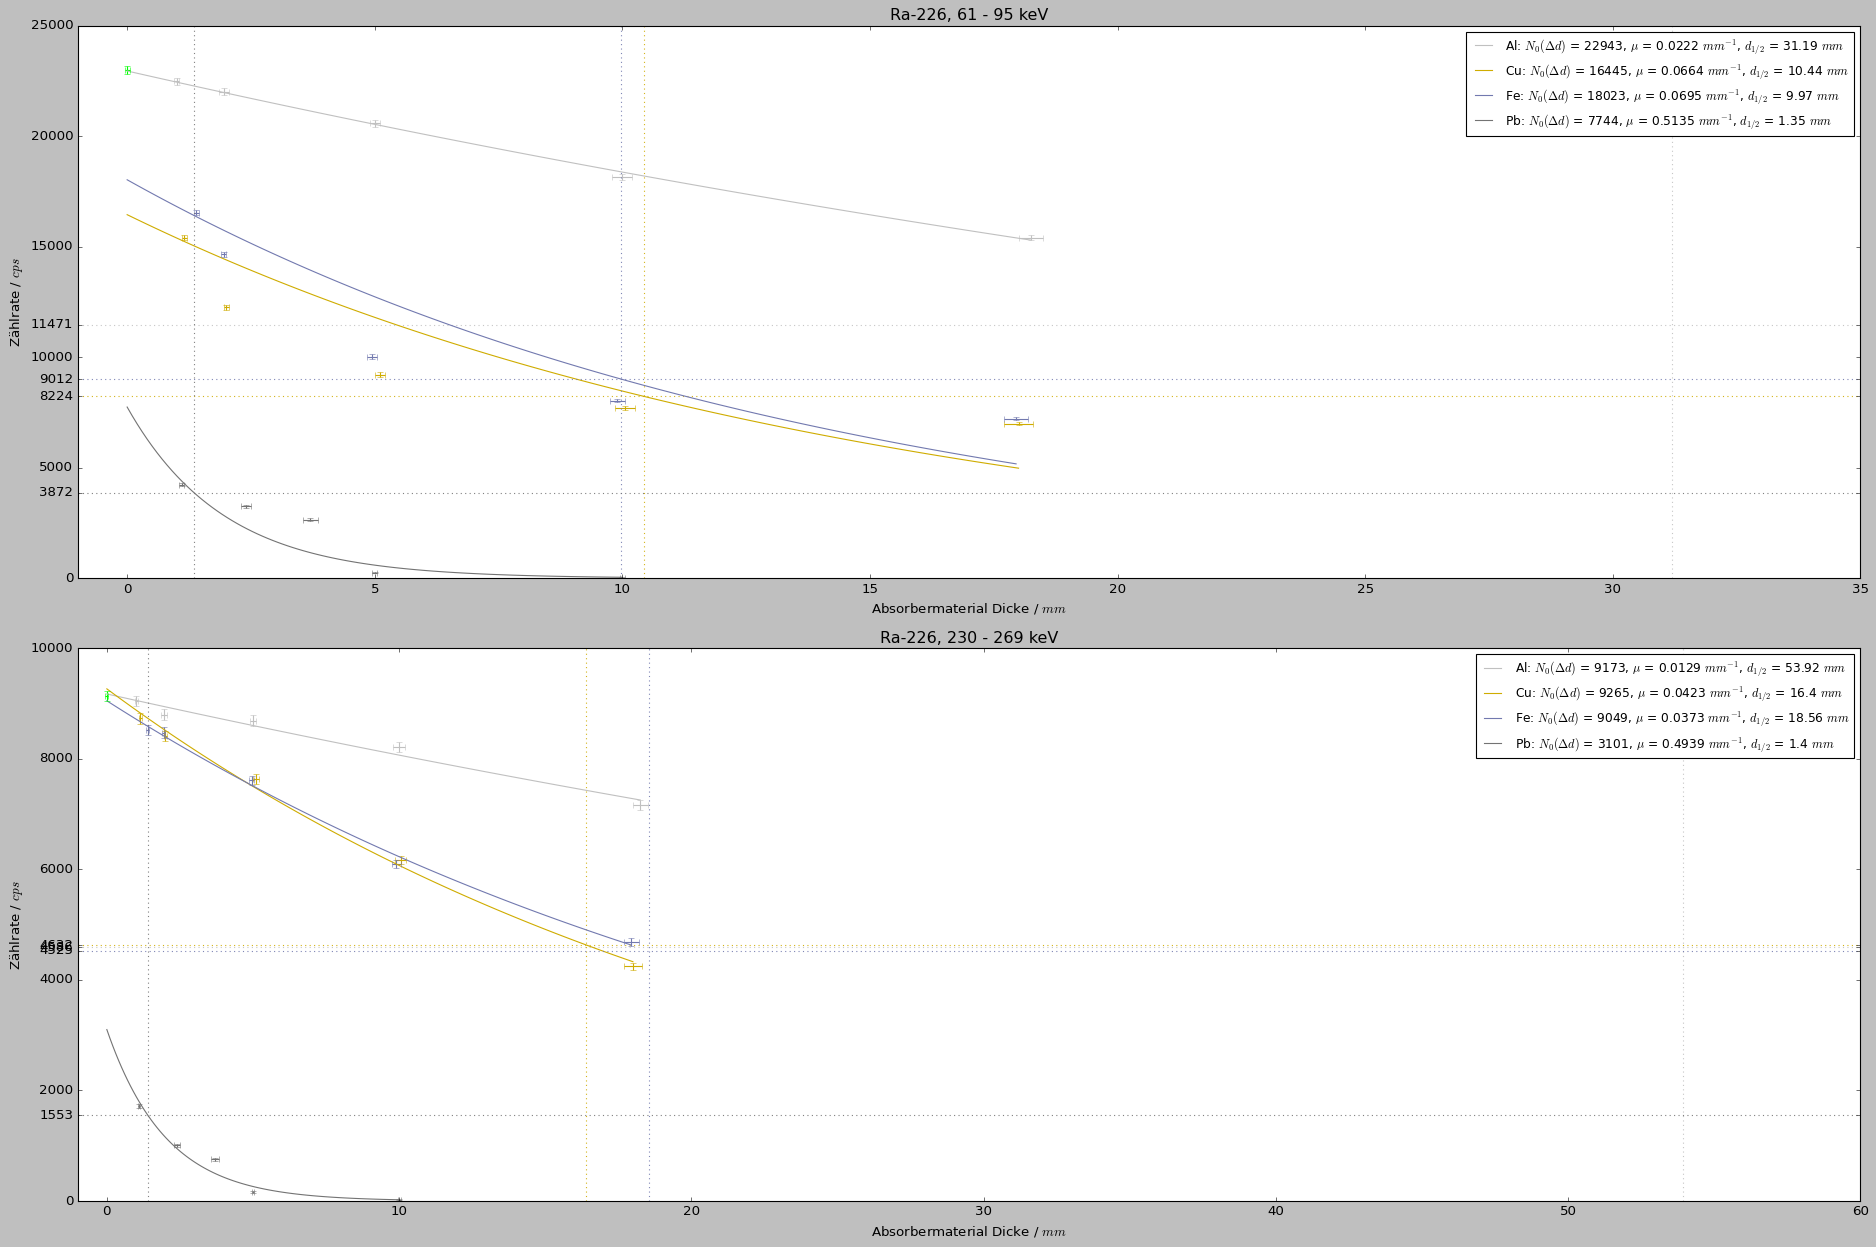

In [79]:
plottyfunct(ra226_1, "Ra-226", dark=False, verbose=True)

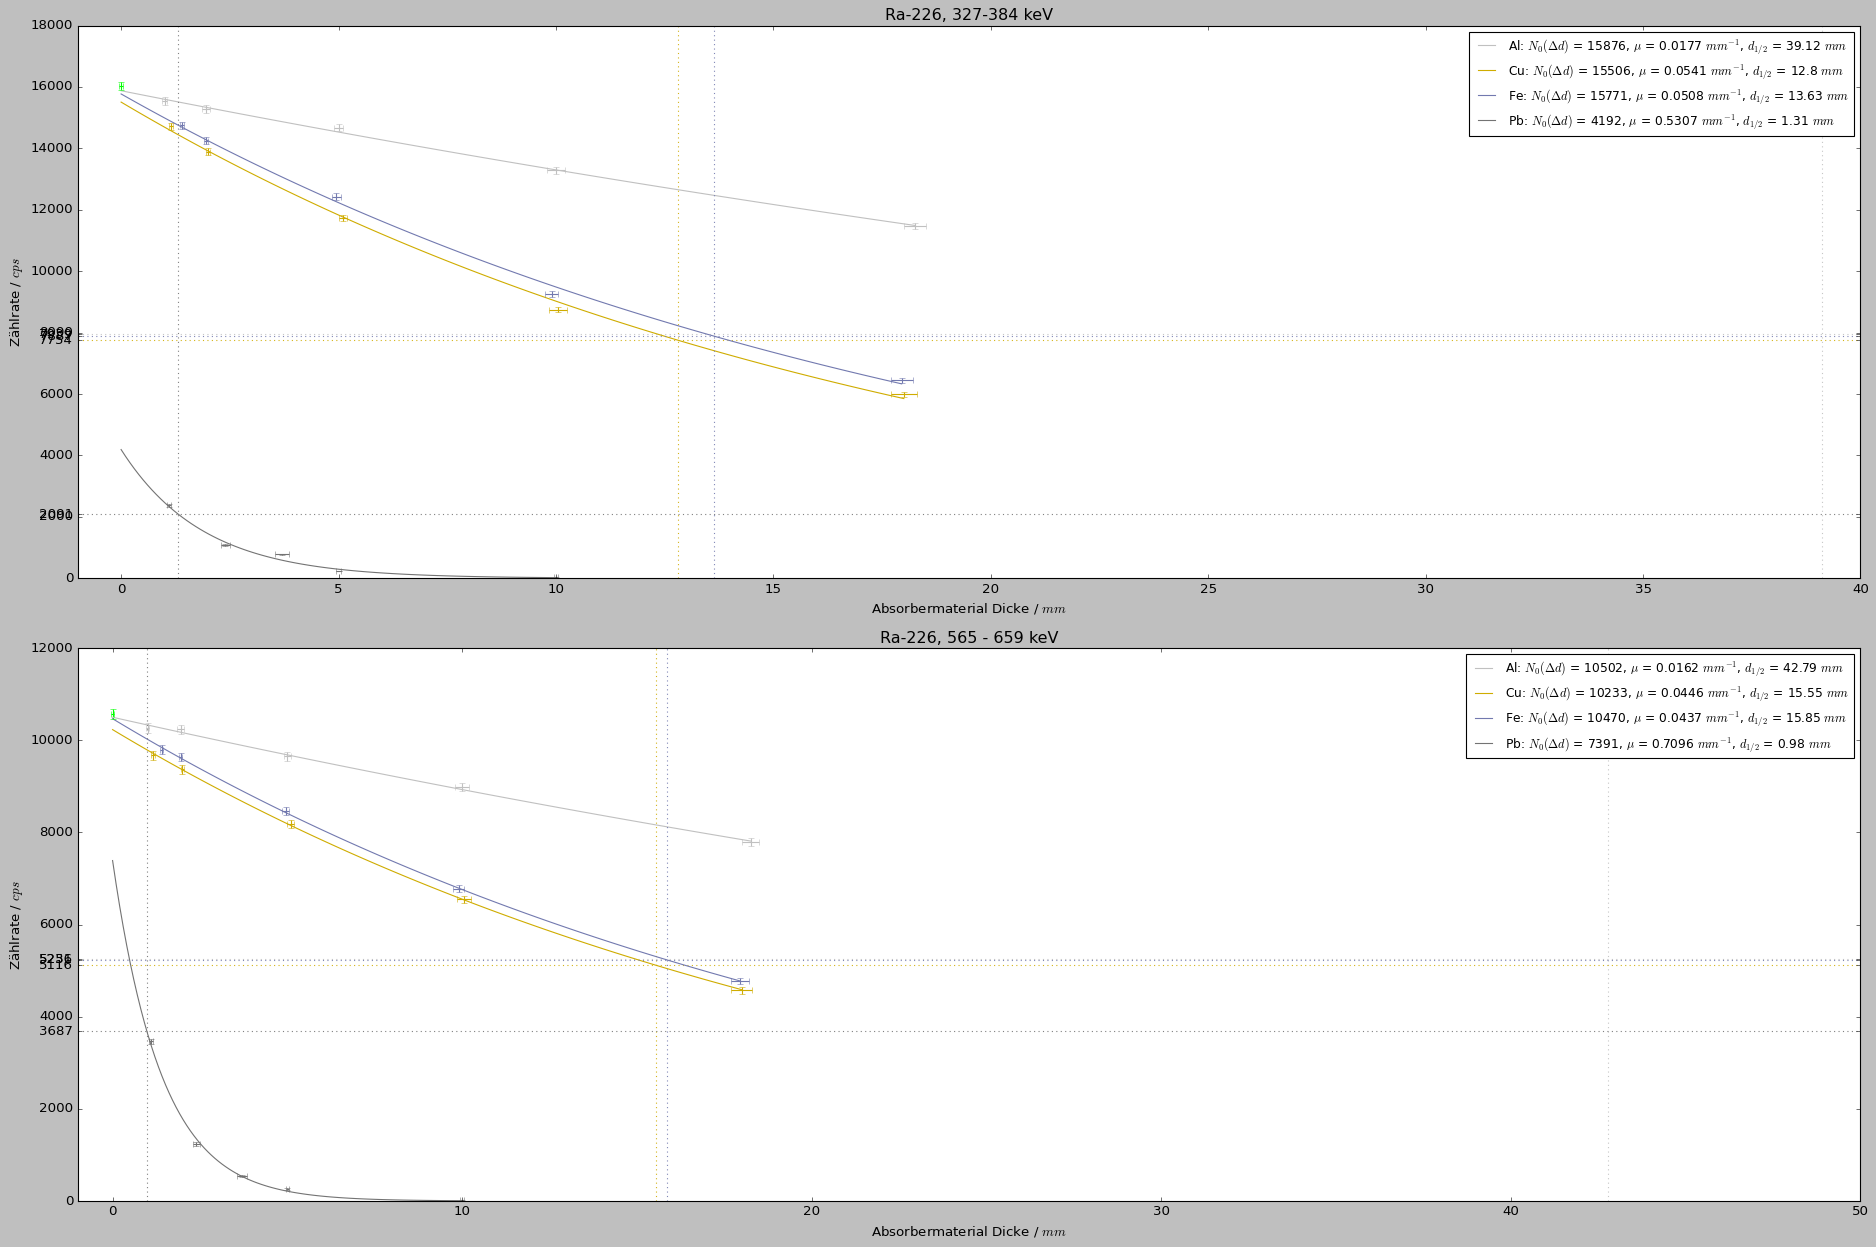

In [80]:
plottyfunct(ra226_2, "Ra-226", dark=False, verbose=True)

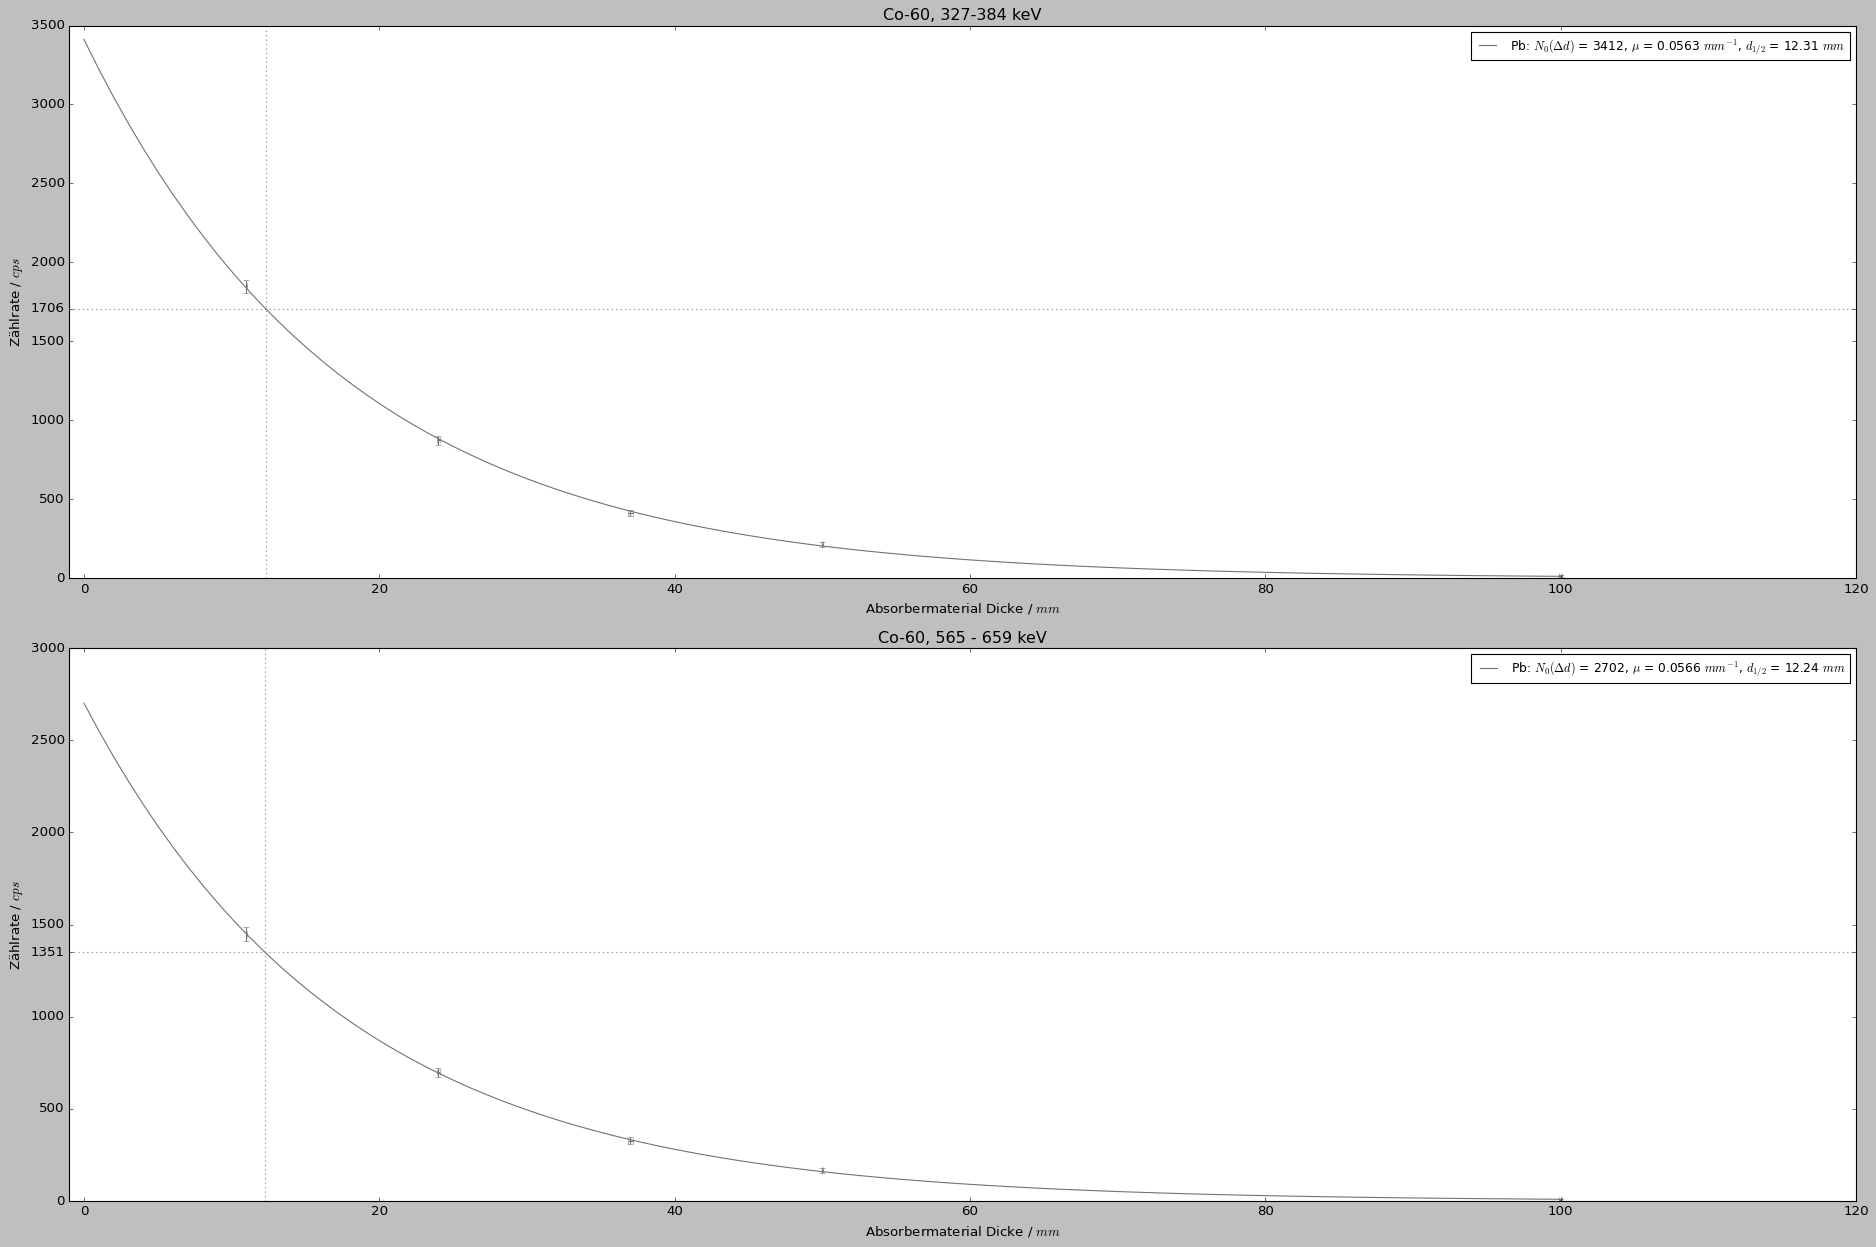

In [81]:
plottyfunct(co60, "Co-60", dark=False, verbose=True)